<a href="https://colab.research.google.com/github/naimish73/stock-prediction-bot/blob/rahul/pycaret_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pycaret yfinance


In [3]:
from pycaret.regression import *
import yfinance as yf

In [7]:
symbol = "^NSEI"
ticker = yf.Ticker(symbol)
data = ticker.history(interval="5m", period="60d")
data.drop(columns=['Volume'	,'Dividends','Stock Splits'],inplace=True)
data

,Open,High,Low,Close
Datetime,,,,
2023-11-30 09:15:00+05:30,20108.500000,20134.199219,20108.500000,20115.500000
2023-11-30 09:20:00+05:30,20113.000000,20122.199219,20108.550781,20119.800781
2023-11-30 09:25:00+05:30,20119.449219,20119.650391,20108.550781,20111.849609
2023-11-30 09:30:00+05:30,20111.500000,20118.849609,20106.500000,20115.550781
2023-11-30 09:35:00+05:30,20115.250000,20127.400391,20092.550781,20122.300781
...,...,...,...,...
2024-02-26 15:05:00+05:30,22132.400391,22133.400391,22122.099609,22132.550781
2024-02-26 15:10:00+05:30,22131.949219,22133.949219,22123.500000,22126.400391
2024-02-26 15:15:00+05:30,22126.449219,22128.050781,22109.800781,22118.550781


In [9]:

s = RegressionExperiment()
s.setup(data, target = 'Close', session_id = 123)
s

,Description,Value
0,Session id,123
1,Target,Close
2,Target type,Regression
3,Original data shape,"(4500, 4)"
4,Transformed data shape,"(4500, 4)"
5,Transformed train set shape,"(3150, 4)"
6,Transformed test set shape,"(1350, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [10]:
# # functional API
# best = compare_models()

# OOP API
best = s.compare_models()
best

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,4.6112,41.2532,6.4014,0.9998,0.0003,0.0002,0.7020
llar,Lasso Least Angle Regression,4.6316,41.3282,6.4081,0.9998,0.0003,0.0002,0.0250
br,Bayesian Ridge,4.6117,41.2559,6.4016,0.9998,0.0003,0.0002,0.0230
huber,Huber Regressor,4.5696,41.6955,6.4321,0.9998,0.0003,0.0002,0.0590
ridge,Ridge Regression,4.6112,41.2501,6.4011,0.9998,0.0003,0.0002,0.0240
lar,Least Angle Regression,4.6111,41.2511,6.4012,0.9998,0.0003,0.0002,0.0230
knn,K Neighbors Regressor,5.8017,69.3061,8.2969,0.9997,0.0004,0.0003,0.0320
et,Extra Trees Regressor,5.7552,72.6181,8.4675,0.9996,0.0004,0.0003,0.6070
rf,Random Forest Regressor,5.8618,73.3274,8.5118,0.9996,0.0004,0.0003,0.9700
lightgbm,Light Gradient Boosting Machine,6.7005,102.0481,10.0330,0.9995,0.0005,0.0003,0.2070


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [13]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

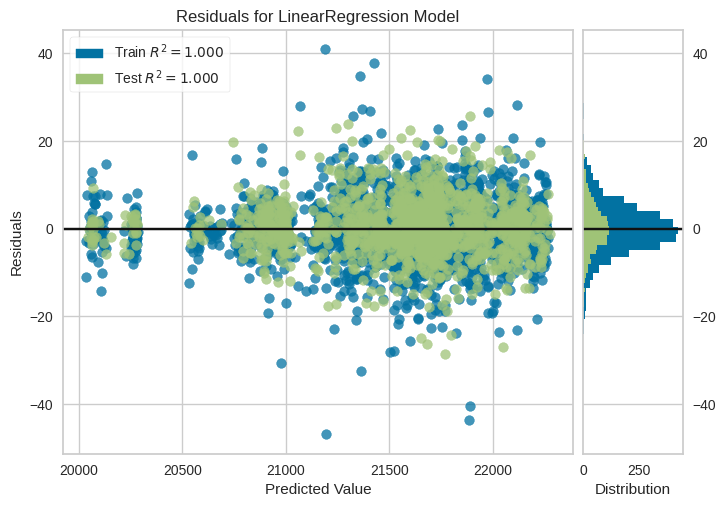

In [14]:
s.plot_model(best, plot = 'residuals')

In [17]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,4.5932,39.2275,6.2632,0.9998,0.0003,0.0002


,Open,High,Low,Close,prediction_label
Datetime,,,,,
2024-01-15 14:45:00+05:30,22069.699219,22086.849609,22067.500000,22081.099609,22082.492188
2023-12-14 11:00:00+05:30,21159.500000,21164.000000,21155.050781,21158.699219,21159.441406
2024-01-23 11:45:00+05:30,21466.099609,21480.349609,21448.849609,21468.199219,21464.968750
2024-01-10 13:35:00+05:30,21489.400391,21494.050781,21479.750000,21489.050781,21485.578125
2024-02-06 14:30:00+05:30,21912.000000,21929.949219,21912.000000,21922.050781,21927.144531
...,...,...,...,...,...
2024-02-15 11:15:00+05:30,21868.300781,21869.900391,21856.800781,21864.349609,21860.433594
2024-01-09 14:45:00+05:30,21556.500000,21580.900391,21555.599609,21564.550781,21576.597656
2024-01-17 10:20:00+05:30,21790.800781,21790.800781,21776.400391,21780.900391,21779.339844


In [16]:

s.save_model(best, '5m_linear_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Open', 'High', 'Low'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', LinearRegression(n_jobs=-1))]),
 '5m_linear_regression.pkl')

In [20]:
import pickle
import os

In [23]:

with open('/content/drive/MyDrive/AI COLLAGE/5m_linear_regression.pkl', 'rb') as f:
    # Load the object from the pickle file
    model = pickle.load(f)